# Unsupservised Learning：Clustering
INCLUDE: 
- Clustering：K-means, Hierarchical Clustering, DBSCAN, Gaussian Mixture Models


无监督学习是指在训练数据中没有目标值的学习任务。这种学习任务的目的是发现数据中的一些结构，比如聚类，降维，或者是发现异常点。




## 0. Distance Metrics
距离度量（Distance Metric）是一种用于衡量两个样本相似度的方法。在无监督学习中，距离度量通常用于计算样本之间的相似度，例如在K-means聚类算法中，需要计算每个数据点到质心的距离。

常用度量指标有：
- **欧氏距离（Euclidean Distance）**：欧氏距离是最常用的距离度量，它是两个样本点欧氏空间中的真实距离，即两个样本点对应特征值差的平方和的平方根： $\( \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} \)$。
- **曼哈顿距离（Manhattan Distance）**：曼哈顿距离是两个样本点对应特征值差的绝对值的和： $\( \sum_{i=1}^{n} |x_i - y_i| \)$。
- **切比雪夫距离（Chebyshev Distance）**：切比雪夫距离是两个样本点对应特征值差的绝对值的最大值： $\( \max_{i=1}^{n} |x_i - y_i| \)$。
- **闵可夫斯基距离（Minkowski Distance）**：闵可夫斯基距离是欧氏距离和曼哈顿距离的一种推广，它是两个样本点对应特征值差的绝对值的最大值： $\( \left(\sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}} \)$。


* Minimum distance: $d(S,T) = \min\{d(x,y) : x \in S,y \in T\} $
* Average distance: $d(S,T) = \frac{1}{|S||T|} \sum_{(x, y)} d(x, y)$
* Maximum distance: $d(S,T) = \max\{d(x,y) : x \in S,y \in T\} $
* Centroid distance: $ d(S,T) = d(\frac{\sum_{x\in S} x}{|S|} \frac{\sum_{y\in T} y}{|T|})$

一般在使用sklearn的聚类算法时，可以通过`metric`参数指定距离度量标准。
The parameter `'single'` in linkage refers to minimum distance. This can be change to `'average'` for average distance, `'complete'` for maximum distance and `'centroid'` for centroid distance. Generate the dendogram for each of these cases. Comment on which metrics are most consistent with the assumption of 3 clusters in the iris data set.

# 1. Clustering
聚类指的是将数据集中的样本分成若干个组，每个组内的样本之间的相似度要高于组间的相似度。聚类的目的是发现数据中的一些结构，比如发现用户的分组，或者是发现相似的图片。

## 1.1 K-Means

K-means聚类是一种广泛使用的无监督学习算法，用于将数据点划分为K个簇（Cluster），使得同一簇内的数据点相似度高，而不同簇内的数据点相似度低。该算法的目标是最小化簇内距离的平方和，即每个点到其质心（簇中心）的距离的平方和。

K-means聚类的基本步骤如下：

1. **初始化**：随机选择K个数据点作为初始质心（簇中心）。
2. **分配**：将每个数据点分配给最近的质心，形成K个簇。
3. **更新**：对于每个簇，重新计算质心，通常是簇内所有点的均值。
4. **重复**：重复分配和更新步骤，直到满足停止条件，如质心不再显著变化，或达到预定的迭代次数。

K-means算法的优点在于简单易实现，计算效率高，特别适用于处理大数据集。但它也有一些局限性，例如需要预先指定K值，对初始质心的选择敏感，可能会收敛到局部最优，且假设簇是凸形和相似的尺寸，这可能不适用于所有类型的数据分布。

#### Centorid
在K-means聚类算法中，质心（centroid）是指一个簇中所有点的坐标平均值，代表该簇的中心位置。计算质心的步骤如下：

1. 对于每个簇，将簇内所有数据点的相同维度的值加在一起。
2. 将上述总和除以该簇中数据点的数量。

用数学表达式来描述，假设簇 $\( C \)$ 有 $\( n \)$ 个数据点，每个数据点是一个 $\( d \)$-维向量 $\( \mathbf{x}_i \)$（其中 $\( i = 1, 2, ..., n \)$），簇 $\( C \)$ 的质心 $\( \mathbf{\mu} \)$ 可以通过以下公式计算：

$$\[ \mathbf{\mu} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i \]$$

这里，$\( \sum_{i=1}^{n} \mathbf{x}_i \)$ 表示将簇内所有数据点的对应维度的值相加，然后该和除以数据点的数量 $\( n \)$，得到的结果是一个新的 $\( d \)$-维向量，代表了簇的质心。每个维度的质心坐标是该维度上所有点坐标的平均值。

#### K 值的选择
寻找最优的K值（即聚类数量）是K-means聚类中的一个重要问题，因为K值的选择会直接影响聚类结果的质量。没有通用的方法来确定最佳的K值，但是有几种常用的技术可以帮助选择一个合适的K值：

1. **肘部法则（Elbow Method）**：
   - 运行K-means算法多次，每次使用不同的K值。
   - 对于每个K值，计算聚类的总内部平方和（SSE，即所有点到其质心的距离的平方和）。
   - 绘制K值与SSE的关系图。
   - 观察图形，寻找“肘部”点，即**SSE开始快速下降变缓的点**。这个点通常被认为是一个好的K值选择。

2. **轮廓系数（Silhouette Score）**：
   - 轮廓系数结合了聚类的凝聚度（Cohesion）和分离度（Separation），用于评估聚类的质量。
   - 对于每个点，计算其与所在簇内其他点的平均距离（凝聚度）以及与最近簇中所有点的平均距离（分离度）。
   - 轮廓系数的范围是[-1, 1]，值越大表示聚类效果越好。
   - 对不同的K值计算轮廓系数，选择轮廓系数最大的K值。

3. **间隔统计量（Gap Statistic）**：
   - 间隔统计量比较原始数据的聚类紧密度与相同规模、同一分布特性的随机数据的聚类紧密度。
   - 对于不同的K值，计算原始数据的聚类结果与随机数据聚类结果的差距。
   - 选择使得这个差距最大化的K值。

4. **交叉验证（Cross-validation）**：
   - 虽然K-means聚类是无监督学习算法，但某些情况下可以通过将数据分成训练集和测试集，使用交叉验证的方法来评估不同K值的聚类效果。


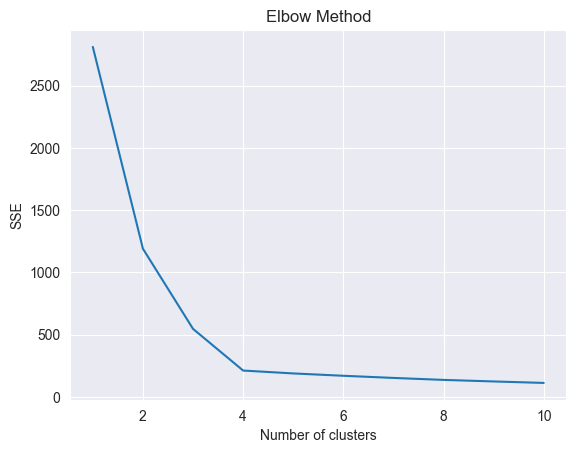

In [1]:
# Elbow Method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 示例数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 计算不同K值的SSE（Sum of Squared Errors）
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# 绘制Elbow图
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

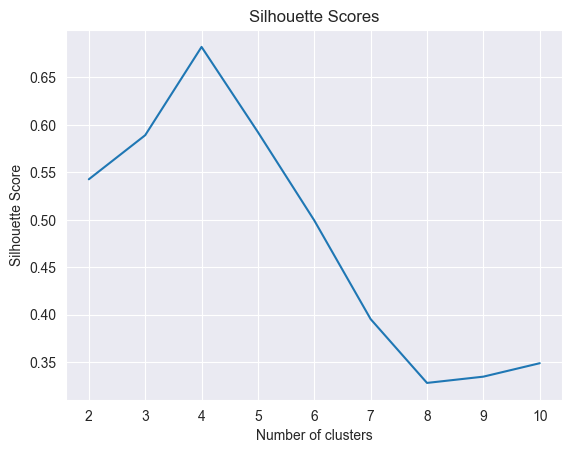

In [2]:
from sklearn.metrics import silhouette_score

# 存储平均轮廓系数
silhouette_scores = []

for k in range(2, 11):  # 轮廓系数至少需要2个簇
    kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 绘制不同K值的轮廓系数图
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

上面两种方式都可以看出，选择K=4是一个比较好的选择。此时，SSE开始快速下降变缓，轮廓系数也达到了最大值。

## 1.2 Hierarchical Clustering--HAC
层次聚类（Hierarchical Clustering）是一种常见的聚类分析方法，它建立一个聚类层次或树状的聚类结构。与K-means聚类等划分聚类方法不同，层次聚类不需要预先指定聚类的数量，它通过逐步合并或分裂数据点来构建一个聚类层次。

### 层次聚类的两种主要方法：
注意：一般来说，层次聚类不适用于大数据集，因为它的计算复杂度是O(n^3)。且通常使用凝聚层次聚类而不是分裂层次聚类，因为分裂层次聚类的计算复杂度更高。

1. **凝聚层次聚类（Agglomerative Hierarchical Clustering）**：
   - **自底向上**的策略，初始时，每个数据点被视为一个单独的聚类。
   - 然后，算法逐步合并最相似或距离最近的聚类对，直到所有的数据点都聚合成一个单独的聚类或达到某个终止条件。
   - 合并时，可以使用不同的距离度量标准，如最近邻距离（单连接），最远邻距离（全连接），组平均距离等。

2. **分裂层次聚类（Divisive Hierarchical Clustering）**：
   - **自顶向下**的策略，开始时所有数据点都在一个聚类中。
   - 然后，算法逐步分裂聚类，直到每个数据点都成为一个单独的聚类或达到某个终止条件。
   - 分裂的决策通常基于一些标准，如最大化聚类间的距离等。

### 层次聚类的结果通常以树状图（Dendrogram）表示：

- **树状图**：一种图形化表示聚类层次的方法，每一次合并或分裂都在树状图上表示为一个分支。
- 树状图的横轴表示数据点或聚类，纵轴表示合并或分裂的距离或相似度。
- 通过选择树状图上的不同高度，可以得到不同数量的聚类。

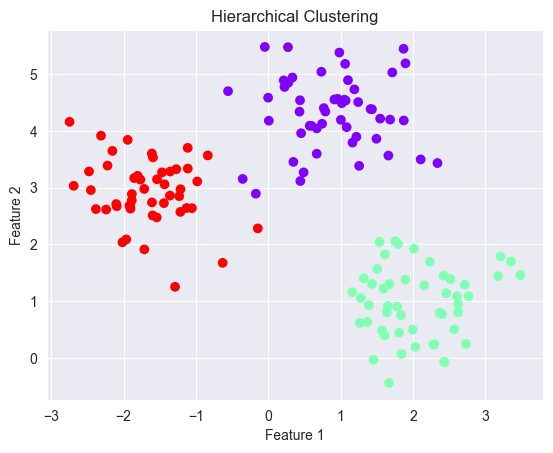

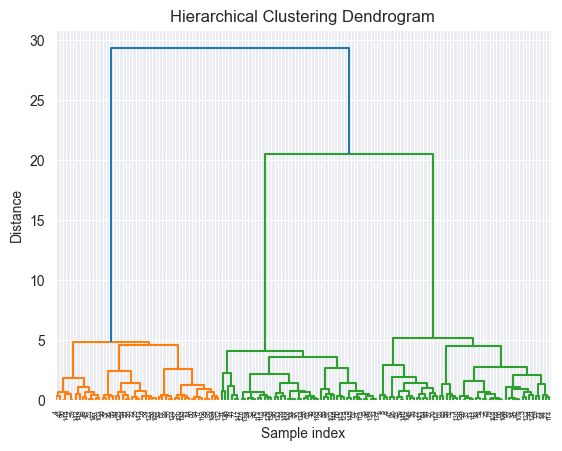

In [3]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.datasets import make_blobs

# 使用make_blobs生成模拟数据
X, _ = make_blobs(n_samples=150, centers=3, cluster_std=0.60, random_state=0)

# 初始化AgglomerativeClustering
# affinity参数指定距离度量标准，linkage参数指定连接算法
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# 应用模型
clustering.fit(X)

# 绘制聚类结果
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 使用ward方法获取连接矩阵
# 该矩阵的每一行包含两个簇的索引和它们的距离
linkage_matrix = ward(X)

# 绘制树状图
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

## 1.3 Gaussian Mixture Models
高斯混合模型（Gaussian Mixture Model，简称GMM）是一种概率模型，它假设所有的数据点都是由有限数量的高斯分布混合而成的。在GMM中，每一个高斯分布称为一个组件（component），每个组件对应于数据中的一个簇。

GMM的参数包括：

- **均值** $\( \mu \)$：每个高斯分布的中心。
- **协方差** $\( \Sigma \)$：每个高斯分布的形状和大小。
- **混合权重** $\( \pi \)$：每个高斯分布在混合中的比例，表明一个随机选取的数据点来自该分布的概率。

一个数据点 $\( x \)$ 的概率密度函数（PDF）可以表示为：

$$\[ p(x) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x | \mu_k, \Sigma_k) \]$$

其中，$\( K \)$ 是混合成分的数量，$\( \mathcal{N}(x | \mu_k, \Sigma_k) \)$ 是高斯分布的概率密度函数，$\( \pi_k \) 是第 \( k \)$ 个组件的混合权重。

### GMM的学习算法

GMM通常通过期望最大化（Expectation-Maximization，简称EM）算法来估计其参数。EM算法是一种迭代算法，包括两个步骤：

1. **E步骤（Expectation Step）**：使用当前的参数估计来计算每个数据点属于每个高斯分布的概率（后验概率）。

2. **M步骤（Maximization Step）**：更新每个高斯分布的参数来最大化期望的对数似然函数，这个期望是在E步骤计算的后验概率下得到的。

这两个步骤交替进行，直到收敛到局部最大值，即参数的估计不再发生显著变化。

### GMM的应用

GMM在许多领域都有应用，例如：

- **聚类**：GMM可以用来识别数据中的簇，类似于K-means，但是由于GMM使用概率模型，因此它可以识别出更复杂的簇结构，并且可以给出数据点属于各个簇的概率。
- **密度估计**：GMM可以用来估计数据的概率密度函数，这在生成模型或异常检测等领域很有用。
- **分类**：GMM也可以用作分类器，通过估计数据点来自不同类别的概率来进行分类。

在`sklearn`中，可以通过`GaussianMixture`类来使用GMM。这个类提供了一个实现了EM算法的接口，可以方便地在数据上拟合GMM并进行预测。通过设置组件数（单高斯分布数量）来定义聚类簇的数量。

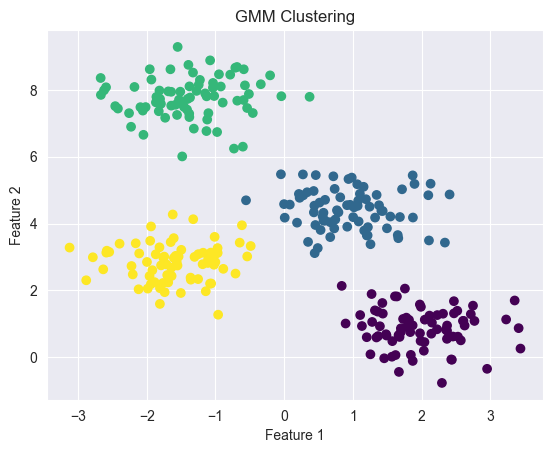

In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 生成模拟数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 使用GMM进行聚类
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## 1.4 DBSCAN
DBSCAN（Density-Based Spatial Clustering of Applications with Noise）是一种基于密度的空间聚类算法，它可以发现任意形状的聚类，并且能够识别噪声点。与基于距离的聚类算法（如K-means）或基于层次的聚类算法（如HAC）不同，DBSCAN关注点的局部密度达到某个阈值时的聚类结构，而不需要事先指定聚类的数量。

DBSCAN算法的核心概念包括：

1. **核心点（Core Point）**：在指定半径 $\( \epsilon \)$ 内含有超过最小数量 $\( MinPts \)$ 的邻居点的点。

2. **边界点（Border Point）**：在 $\( \epsilon \)$ 半径内邻居数量少于 $\( MinPts \)$ 但是属于核心点邻域的点。

3. **噪声点（Noise Point）**：既不是核心点也不是边界点的点。

DBSCAN算法的步骤：

1. 对于每个点，计算其 $\( \epsilon \)$ 半径内的邻居点数量。
   
2. 标记满足核心点定义的点。
   
3. 对于每个核心点，如果它尚未被分配到任何聚类中，创建一个新的聚类，并将其和它的所有直接密度可达的点（即 \( \epsilon \) 半径内的点）加入此聚类。然后，对这些点的邻居点进行迭代，将密度可达的核心点及其邻居点加入相同的聚类中。
   
4. 迭代进行，直到所有的点都被访问。最终，每个点要么被标记为某个聚类的一部分，要么被标记为噪声。

DBSCAN算法的优点：

- 不需要事先指定聚类数量。
- 可以识别任意形状的聚类。
- 对噪声和离群点有良好的鲁棒性。

DBSCAN算法的缺点：

- 在高维空间中效果不佳，因为随着维度的增加，所有点之间的距离都变得相似（维度的诅咒）。
- 如果聚类的密度差异很大，选择合适的 \( \epsilon \) 和 \( MinPts \) 可以很具挑战性。

在Python中，DBSCAN算法可以通过`sklearn.cluster.DBSCAN`类轻松实现。

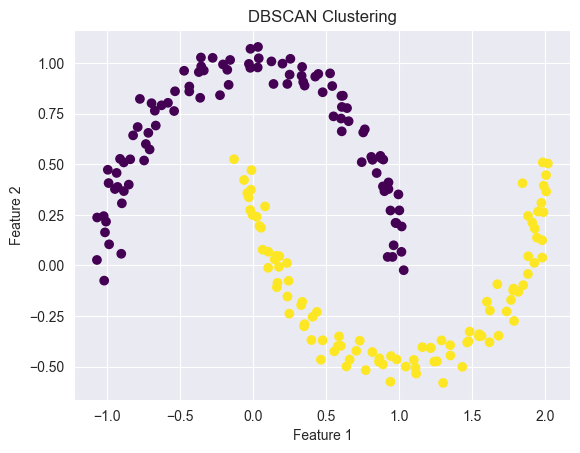

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# 生成模拟数据
X, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 2. Dimensionality Reduction
降维（Dimensionality Reduction）是指将数据从高维空间转换到低维空间的过程。在机器学习中，降维可以用于数据可视化、加快训练速度、提高模型泛化能力等。


## 2.1 Principal Component Analysis (PCA)
主成分分析（PCA）是一种无监督学习方法，它可以将数据从高维空间降维到低维空间，同时保留数据中的大部分信息。
PCA的关键步骤如下：

1. **标准化数据**：对数据进行标准化处理，使各个特征的均值为0，方差为1。
2. **计算协方差矩阵**：通过数据点的标准化值计算协方差矩阵。协方差矩阵反映了数据各维度之间的相关性。
3. **计算特征值和特征向量**：对协方差矩阵进行特征分解，得到特征值和对应的特征向量。
4. **选择主成分**：根据特征值的大小选择最重要的几个特征向量。这些特征向量定义了新的空间，其中数据的方差最大。
5. **数据降维**：使用选定的主成分将原始数据转换到新的空间中。

### 应用场景

1. **数据降维**：在处理具有大量特征的数据集时，PCA可以减少特征的数量，同时尽可能保留数据的重要信息。
2. **噪声过滤**：去除数据中的噪声，并找出数据的主要趋势。
3. **可视化**：将多维数据降至二维或三维，便于可视化。
4. **特征工程**：PCA可以用于特征提取，提取出最具有代表性的特征。详细请看'Python_Data_Analysis/Feature Engineering.ipynb'

### Python 代码示例

以下是一个使用Python中的`sklearn`库进行PCA的简单示例：

- `PCA(n_components)`：用于指定主成分的个数，即降维后的维度.
- `fit_transform()`：用于拟合模型并将数据转换到主成分坐标系中.
- `components_`：用于获取主成分（特征向量）.
- `explained_variance_ratio_`：用于获取解释的方差比例，即每个主成分解释的方差占总方差的比例.

可以看到原本数据为3*2矩阵，经过PCA降维后，第二列变为一个0向量，即所有信息都可以由第一列给出。



In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 示例数据
X = np.array([[1, 2], [3, 4], [5, 6]])
print('原数据（三维）：\n',X)

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用PCA,指定主成分的个数为2; n_components<=min(n_samples,n_features),n_samples为样本个数，即行数，n_features为特征个数，即列数
pca = PCA(n_components=2)
pca.fit(X_scaled)

# 输出主成分
print("主成分（特征向量）:\n", pca.components_)

# 输出解释的方差比例
# print("解释的方差比例:", pca.explained_variance_ratio_)
# 解释的方差比例: [1.00000000e+00 4.10865055e-33],第一个主成分解释了100%的方差，第二个主成分解释了0%的方差

# 将数据转换到主成分坐标系
X_pca = pca.transform(X_scaled)
# print("转换后的数据:\n", X_pca)

# 将转换后的数据转换为DataFrame，列名为PC1,PC2
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
print(X_pca.head())

原数据（三维）：
 [[1 2]
 [3 4]
 [5 6]]
主成分（特征向量）:
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
        PC1  PC2
0 -1.732051  0.0
1  0.000000  0.0
2  1.732051  0.0


#### 载荷矩阵 Loadings
载荷矩阵显示了原始特征与主成分之间的关系。pca.components_提供了一个载荷矩阵，其中的每一行对应一个主成分，每一列对应一个原始特征。这个矩阵被转置（.T），使得行变成原始特征，列变成主成分。最后，创建一个新的DataFrame loadings 来存储这个矩阵，并打印出来。

载荷值（loadings）显示了每个原始特征对每个主成分的贡献程度，可以帮助理解每个主成分背后的意义。
- 正载荷（Positive Loadings）: 当载荷为正数时，这意味着原始特征与对应的主成分正相关。即当该特征的值增加时，主成分的值也倾向于增加。
- 负载荷（Negative Loadings）: 当载荷为负数时，表示原始特征与对应的主成分负相关。即当该特征的值增加时，主成分的值倾向于减少。

In [7]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=['ori-feature1','ori-feature2']  # and the rows are the original features
)
print('载荷矩阵：\n',loadings)

载荷矩阵：
                    PC1       PC2
ori-feature1  0.707107  0.707107
ori-feature2  0.707107 -0.707107


#### 可视化主成分
图一为解释变量的方差比例，图二为累计方差比例。

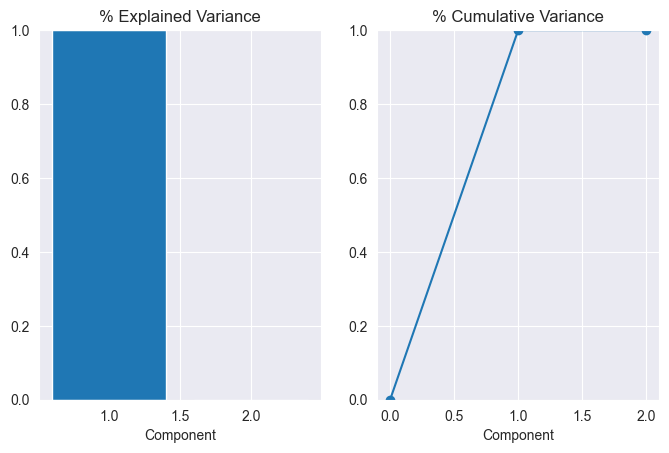

In [8]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_ # 解释的方差比例
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr) # 累计方差比例，np.cumsum()函数用于累加数组中的元素
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca);